In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def file_path(name):
    return "./data/%s" % name

In [4]:
def inflow():
    inflow_pd = pd.read_csv(file_path("oecd_inflow.csv"), skiprows = 6)
    inflow_np = np.array(inflow_pd)
    return inflow_pd

In [5]:
def immigration():
    immigration_pd = pd.read_csv(file_path("immigration.csv"))
    immigration_np = np.array(immigration_pd)
    return immigration_pd

In [6]:
inflow_pd = pd.read_csv(file_path("oecd_inflow.csv"), skiprows = 6)
inflow_pd = inflow_pd.set_index('Country')
inflow_pd = inflow_pd.iloc[0:35,34]
inflow_pd = inflow_pd.drop(labels = ['GRC'])
inflow_pd

Country
AUS     218488
AUT     158746
BEL     103187
CAN     296385
CHL     135490
CZE      34808
DNK      54641
EST       7693
FIN      27274
FRA     245663
DEU    1719075
HUN      23803
ISL       7859
IRL      53900
ISR      25977
ITA     262929
JPN     427585
KOR     402203
LVA       3448
LUX      21557
MEX      35906
NLD     182160
NZL      95634
NOR      58508
POL     107038
PRT      46921
SVK       3610
SVN      20028
ESP     352174
SWE     142986
CHE     143100
TUR     380921
GBR     455000
USA    1183505
Name: Unnamed: 35, dtype: object

In [7]:
#issues with decimal place
immigration_pd = pd.read_csv(file_path("immigration.csv"))
immigration_pd

,Country,0
0,ALB,1058.352776
1,ARG,208449.829100
2,ARM,851.465241
3,AUS,754026.841400
4,AUT,225076.572500
...,...,...
129,VNM,14564.641870
130,VUT,71.319198
131,YEM,292.536192
132,ZAF,48888.671880


In [8]:
data = pd.merge(immigration_pd, inflow_pd, on = 'Country')
data

,Country,0,Unnamed: 35
0,AUS,7.540268e+05,218488
1,AUT,2.250766e+05,158746
2,BEL,2.410689e+05,103187
3,CAN,9.365806e+05,296385
4,CHE,6.717109e+05,143100
5,CHL,1.004171e+05,135490
6,CZE,6.407492e+04,34808
7,DEU,2.109282e+06,1719075
8,DNK,1.879154e+05,54641
9,ESP,5.720408e+05,352174


In [9]:
#immigration John gave me
#np.set_printoptions(suppress=True,
   #formatter={'float_kind':'{:0.2f}'.format})
a = data.iloc[:,1].values
np.set_printoptions(suppress=True)
a = np.round(a)
a

array([  754027.,   225077.,   241069.,   936581.,   671711.,   100417.,
          64075.,  2109282.,   187915.,   572041.,     9686.,   120147.,
        1298253.,  1601229.,    40855.,   212854.,    12966.,   218431.,
         993953.,  3086860.,   732241.,    76044.,    10503.,   297956.,
         433809.,   272968.,   138630.,    87459.,    28383.,    14795.,
         286377.,   256779., 18180729.])

In [10]:
#numbers im comparing to
new_list = []
b = (data.iloc[:,2].values)

for item in b:
    new_list.append(float(item))
#map(float, b)
#[float(i) for i in b]
#res = b.astype(np.float)
#b = np.fromstring(b, dtype = np.float)
#bp = b.astype(pd.float)
new_list

[218488.0,
 158746.0,
 103187.0,
 296385.0,
 143100.0,
 135490.0,
 34808.0,
 1719075.0,
 54641.0,
 352174.0,
 7693.0,
 27274.0,
 245663.0,
 455000.0,
 23803.0,
 53900.0,
 7859.0,
 25977.0,
 262929.0,
 427585.0,
 402203.0,
 21557.0,
 3448.0,
 35906.0,
 182160.0,
 58508.0,
 107038.0,
 46921.0,
 3610.0,
 20028.0,
 142986.0,
 380921.0,
 1183505.0]

In [11]:
#countries
c = data.iloc[:,0].values
c

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK',
       'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'HUN', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'POL',
       'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA'], dtype=object)

In [12]:
#UNSORTED IMMIGRATION GRAPH (not in ascending order)

#x = np.arange(len(c))
#width = 0.35

#fig, ax = plt.subplots(figsize = (30,15))
#rects1 = ax.bar(x - width/2, a, width, label = 'original that john gave me')
#rects2 = ax.bar(x + width/2, new_list, width, label = 'comparison')
#ax.set_xticks(x)
#ax.set_xticklabels(c)
#plt.legend(loc=2)

#start, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(start, end, 0.712123))

#def autolabel(rects):
    #for rect in rects:
        #height = rect.get_height()
        #ax.annotate('{}'.format(height),
                    #xy=(rect.get_x() + rect.get_width() / 2, height),
                    #xytext=(0, 3),  # 3 points vertical offset
                    #textcoords="offset points",
                    #ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#plt.show()

In [13]:
#label = data['Country']
#comparison_data = data[['0']]
#original_data = data[['Unnamed: 35']]
#width = 0.35
#r1 = np.arange(len(comparison_data))
#r2 = [x + width for x in r1]
#plt.bar(r1, a)
#plt.bar(r2, original_data)
#plt.show()
#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, comparison_data, width, label = 'comparison')
#rects2 = ax.bar(x + width/2, original_data, width, label = 'original')
#plt.hist(rects1)

In [14]:
a.sort()
print(a)

[    9686.    10503.    12966.    14795.    28383.    40855.    64075.
    76044.    87459.   100417.   120147.   138630.   187915.   212854.
   218431.   225077.   241069.   256779.   272968.   286377.   297956.
   433809.   572041.   671711.   732241.   754027.   936581.   993953.
  1298253.  1601229.  2109282.  3086860. 18180729.]


In [15]:
#ammending it so that USA is only 5 million to show other vals more clearly b/c real value is so much higher
a_resorted = [9686.00, 10503.00, 12966.00, 14795.00, 28383.00, 40855.00, 64075.00, 76044.00,
 87459.00, 100417.00, 120147.00, 138630.00, 187915.00, 212854.00, 218431.00,
 225077.00, 241069.00, 256779.00, 272968.00, 286377.00, 297956.00, 433809.00,
 572041.00, 671711.00, 732241.00, 754027.00, 936581.00, 993953.00, 1298253.00,
 1601229.00, 2109282.00, 3086860.00, 5000000.00]

In [16]:
b_resorted = [7693,
3448,
7859,
20028,
3610,
23803,
34808,
21557,
46921,
135490,
27274,
107038,
54641,
53900,
25977,
158746,
103187,
380921,
58508,
142986,
35906,
182160,
352174,
143100,
402203,
218488,
296385,
262929,
245663,
455000,
1719075,
427585,
1183505]

In [17]:
c_resorted = ['EST','LVA','ISL','SVN','SVK','HUN','CZE','LUX','PRT','CHL','FIN','POL','DNK','IRL','ISR','AUT',
              'BEL','TUR','NOR','SWE','MEX','NLD','ESP','CHE','KOR','AUS','CAN','ITA','FRA','GBR','DEU','JPN',
              'USA']

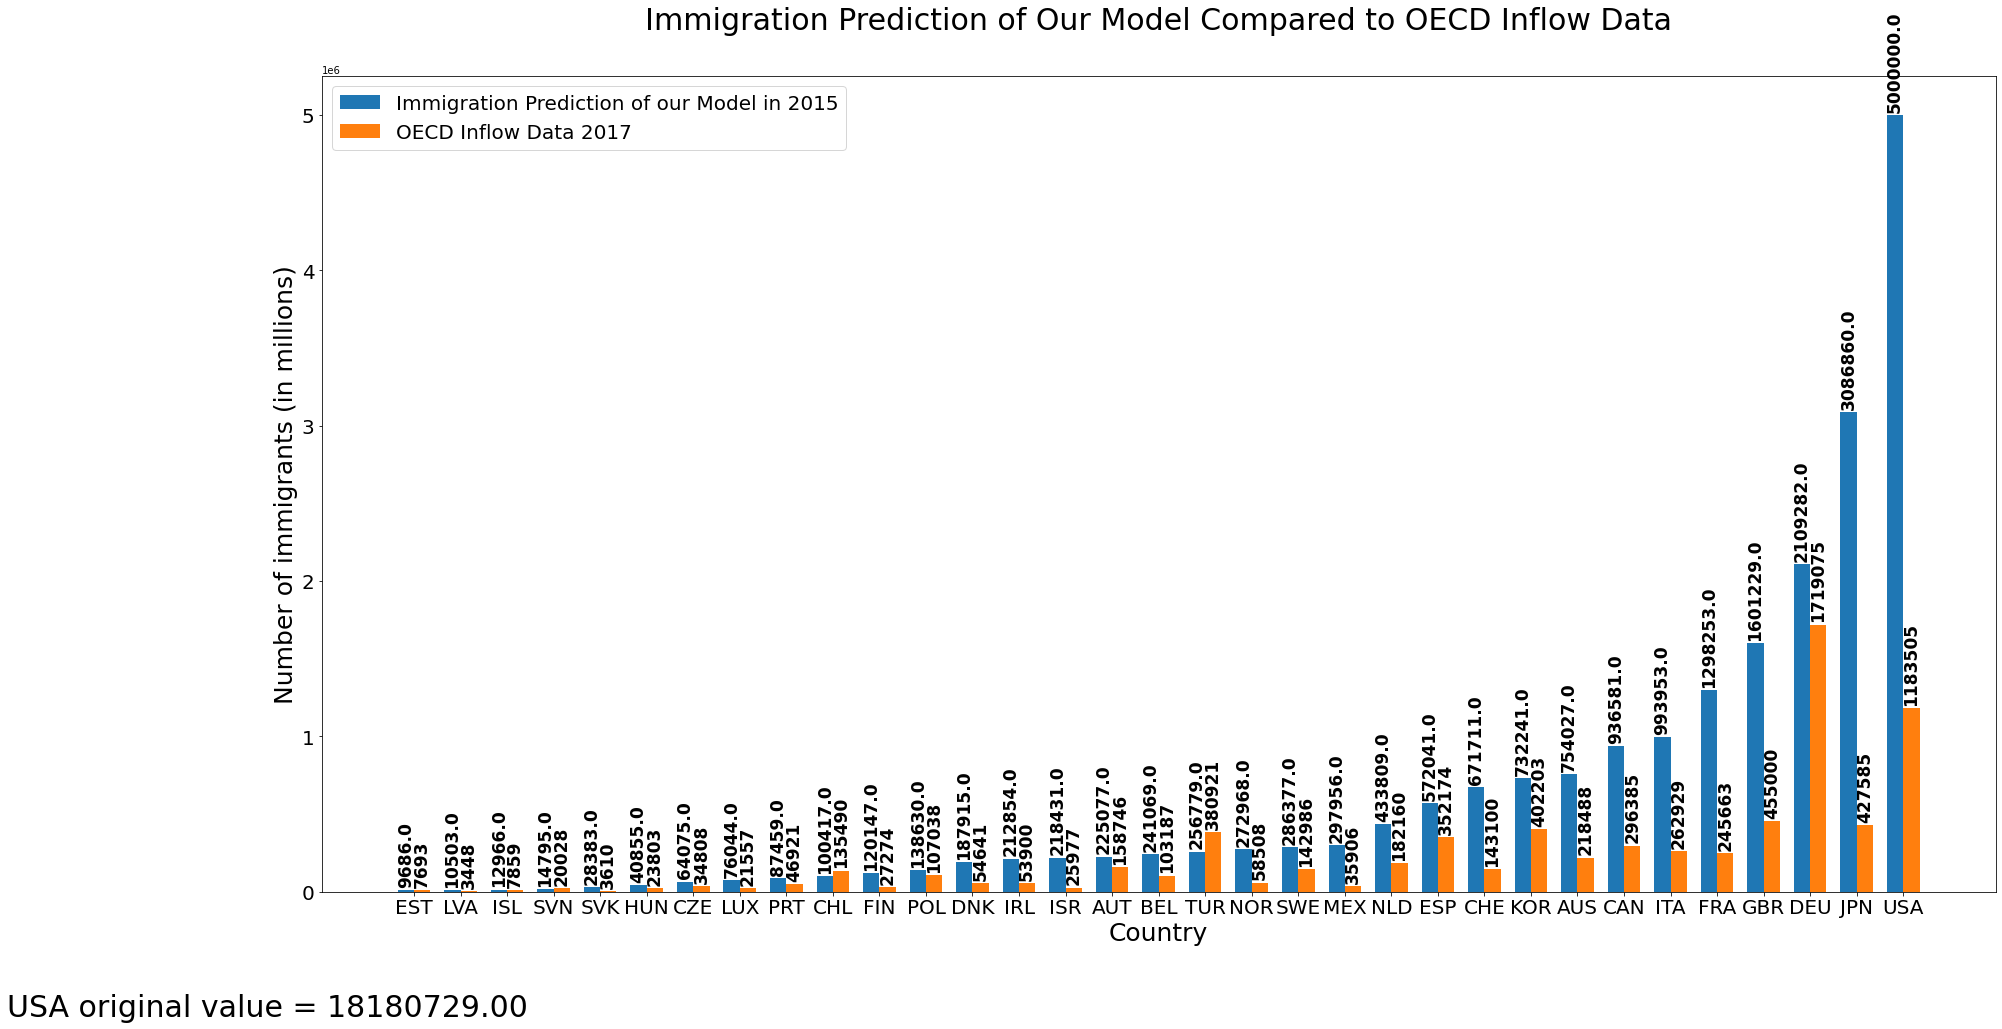

In [29]:
x = np.arange(len(c_resorted))
width = 0.35

fig, ax = plt.subplots(figsize = (30,15))
rects1 = ax.bar(x - width/2, a_resorted, width, label = 'Immigration Prediction of our Model in 2015')
rects2 = ax.bar(x + width/2, b_resorted, width, label = 'OECD Inflow Data 2017')
ax.set_xticks(x)
ax.set_xticklabels(c_resorted, fontsize = 20)
ax.set_title('Immigration Prediction of Our Model Compared to OECD Inflow Data', fontsize = 30, x = .5, y = 1.05)
ax.set_ylabel('Number of immigrants (in millions)', fontsize = 25);
ax.set_xlabel('Country', fontsize = 25)
plt.figtext(0.1, 0.01, "USA original value = 18180729.00", ha="center", fontsize=30)
#matplotlib.pyplot.annotate('annotate', xy=(30, 5), xytext=(23, 14),
            #arrowprops=dict(facecolor='black', shrink=0.05))
plt.yticks(fontsize=20)
plt.legend(loc=2, prop={"size":20})

#start, end = ax.get_ylim()
#ax.yaxis.set_ticks(np.arange(start, end, 0.712123))

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 'vertical', fontsize = 17, fontweight = 'bold')


autolabel(rects1)
autolabel(rects2)
plt.show()

In [49]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,3,3])
#ax.bar(c,new_list)
#plt.show()

In [50]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,3,3])
#ax.bar(c,a)
#plt.show()